# 📍 Importing all the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

py.init_notebook_mode()

# 📍 EDA

In [3]:
rta = pd.read_csv('D:/MGP/Project-1/RTA Dataset.csv')

In [3]:
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestri

In [4]:
rta.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

<AxesSubplot:xlabel='Driving_experience'>

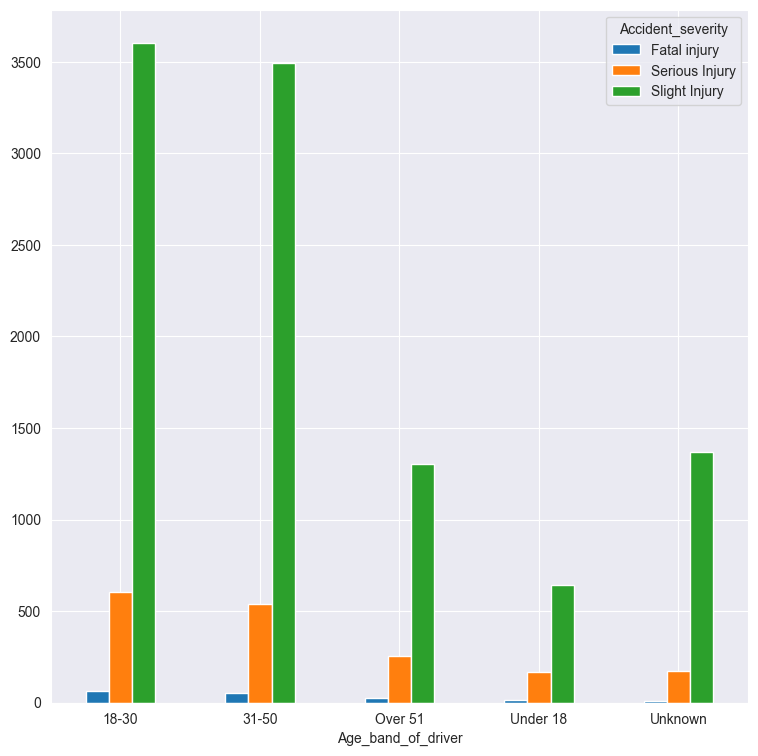

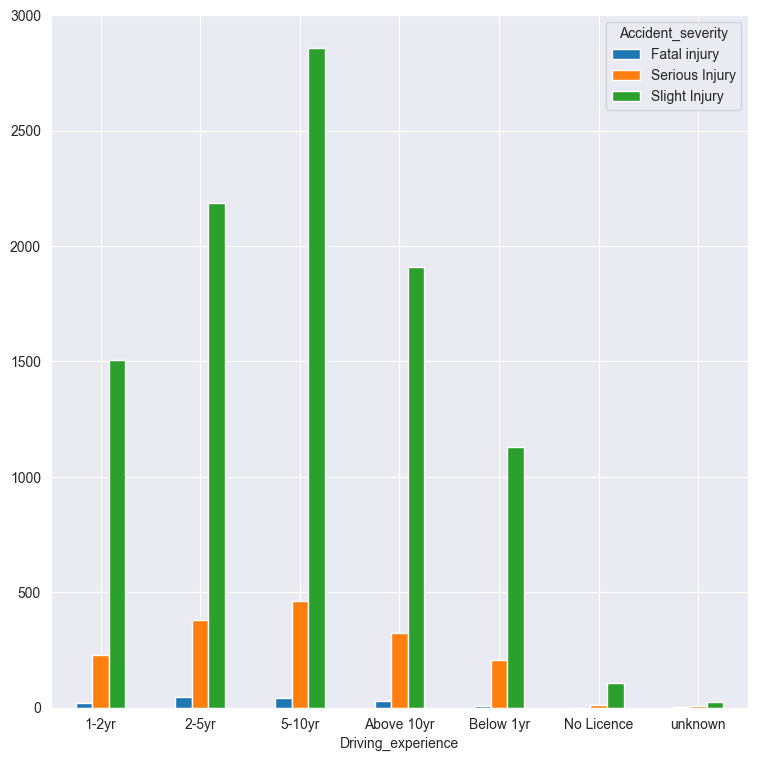

In [5]:
CrosstabResult=pd.crosstab(index=rta['Age_band_of_driver'],columns=rta['Accident_severity'])
CrosstabResult1=pd.crosstab(index=rta['Driving_experience'],columns=rta['Accident_severity'])
CrosstabResult.plot.bar(figsize=(9,9),rot=0)
CrosstabResult1.plot.bar(figsize=(9,9),rot=0)

In [6]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
rta['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

In [8]:
rta_Cause_of_accident = rta.loc[(rta['Cause_of_accident']=='No distancing') | (rta['Cause_of_accident']=='Changing lane to the right') | (rta['Cause_of_accident']=='Changing lane to the left') | (rta['Cause_of_accident']=='Driving carelessly'),['Cause_of_accident','Accident_severity']]

<AxesSubplot:xlabel='Cause_of_accident'>

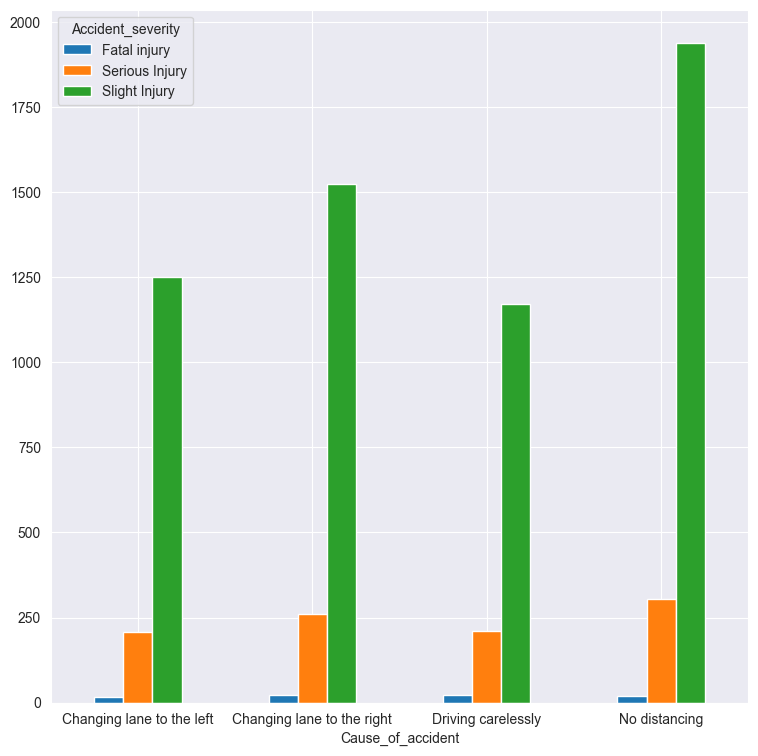

In [9]:
CrosstabResult2=pd.crosstab(index=rta_Cause_of_accident['Cause_of_accident'],columns=rta_Cause_of_accident['Accident_severity'])
CrosstabResult2.plot.bar(figsize=(9,9),rot=0)

<AxesSubplot:xlabel='Educational_level'>

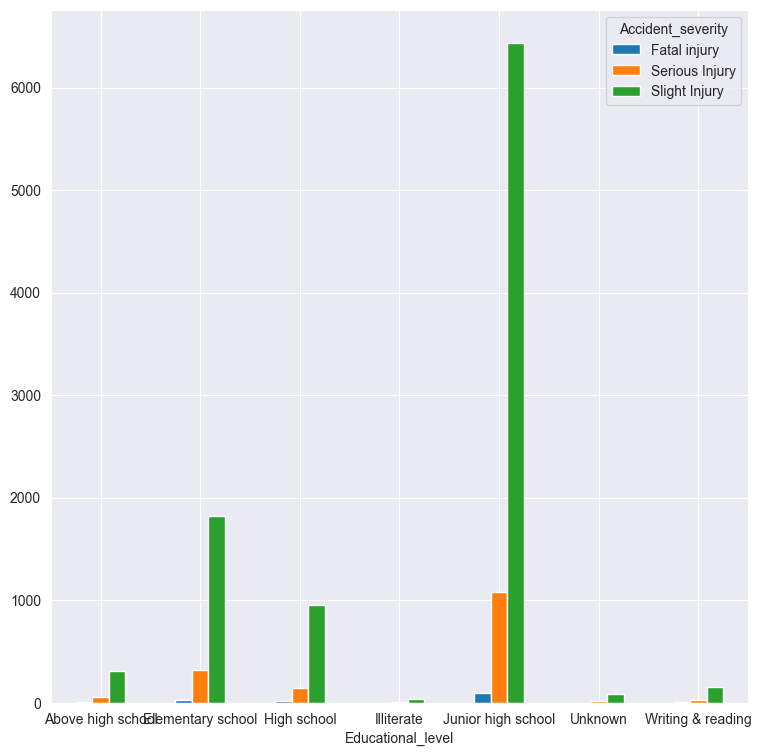

In [10]:
CrosstabResult3=pd.crosstab(index=rta['Educational_level'],columns=rta['Accident_severity'])
CrosstabResult3.plot.bar(figsize=(9,9),rot=0)

<AxesSubplot:xlabel='Service_year_of_vehicle'>

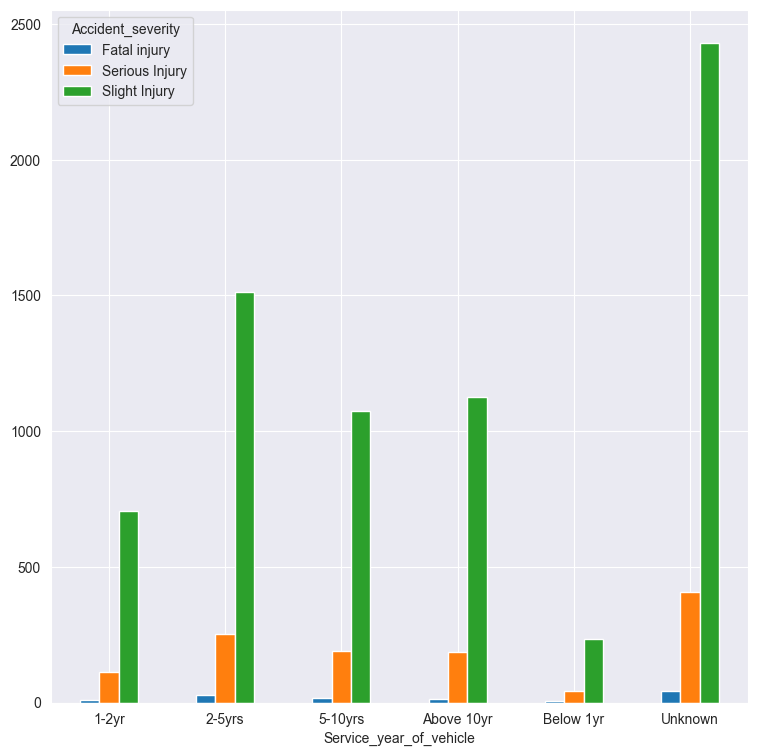

In [11]:
CrosstabResult4=pd.crosstab(index=rta['Service_year_of_vehicle'],columns=rta['Accident_severity'])
CrosstabResult4.plot.bar(figsize=(9,9),rot=0)

In [12]:
rta.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [13]:
# converting 'time' to datetime
rta['Time'] = pd.to_datetime(rta['Time'])

# date (day-month-year) time
rta["Time"].dt.hour

# extracting hour and minute from timestamp
rta['hour'] = rta['Time'].dt.hour
rta['minute'] = rta['Time'].dt.minute
#rta.drop('Time', axis=1, inplace=True)

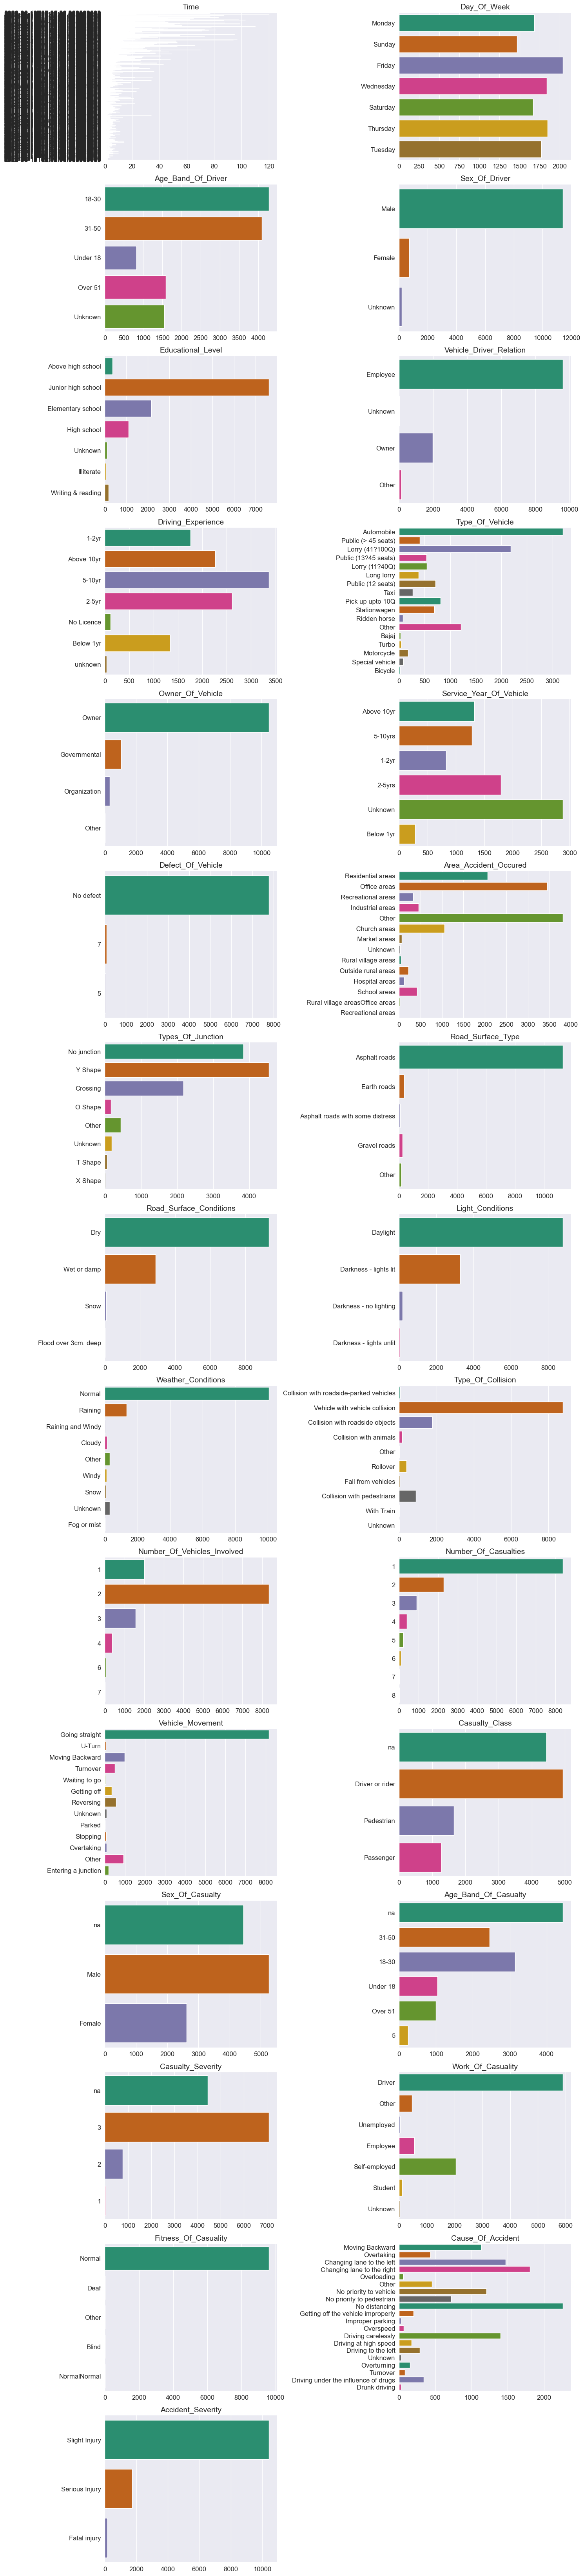

In [14]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in rta.drop(['hour', 'minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= rta.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=rta, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

# Feature-1 with more number of NaN values: Defect_of_vehicle

### Filling all NaN values with No defect as the mode of the data column

In [15]:
rta['Defect_of_vehicle'] = rta['Defect_of_vehicle'].fillna('No defect')

In [16]:
rta['Defect_of_vehicle'].value_counts()

No defect    12204
7               76
5               36
Name: Defect_of_vehicle, dtype: int64

<AxesSubplot:xlabel='Defect_of_vehicle'>

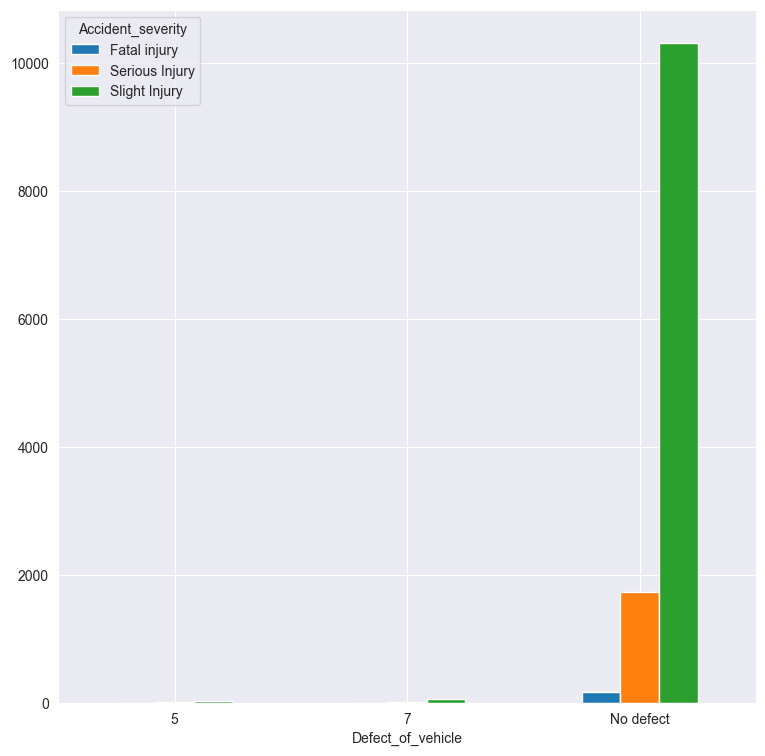

In [17]:
CrosstabResult5=pd.crosstab(index=rta['Defect_of_vehicle'],columns=rta['Accident_severity'])
CrosstabResult5.plot.bar(figsize=(9,9),rot=0)

<AxesSubplot:xlabel='Day_of_week'>

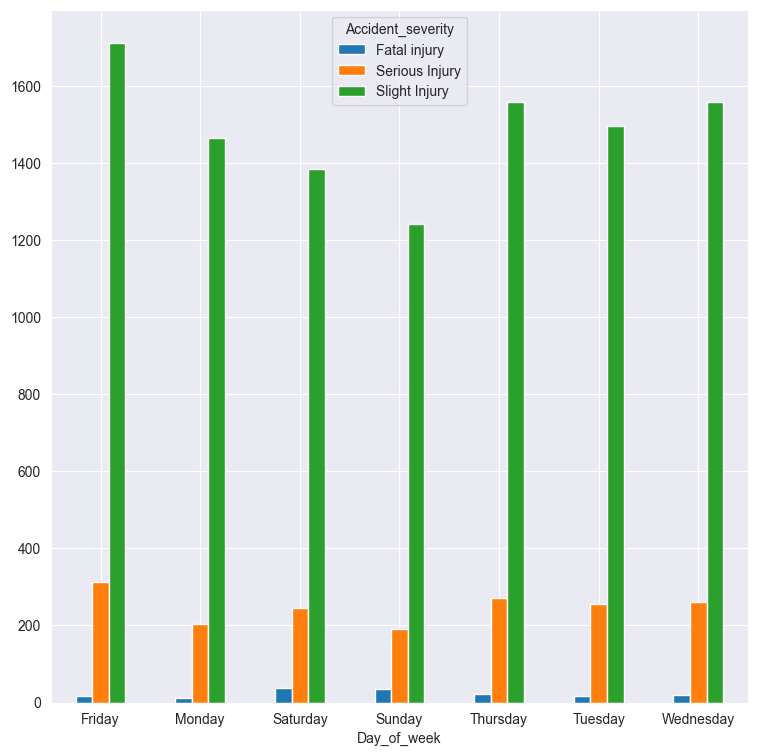

In [18]:
CrosstabResult6=pd.crosstab(index=rta['Day_of_week'],columns=rta['Accident_severity'])
CrosstabResult6.plot.bar(figsize=(9,9),rot=0)

<AxesSubplot:xlabel='Sex_of_driver'>

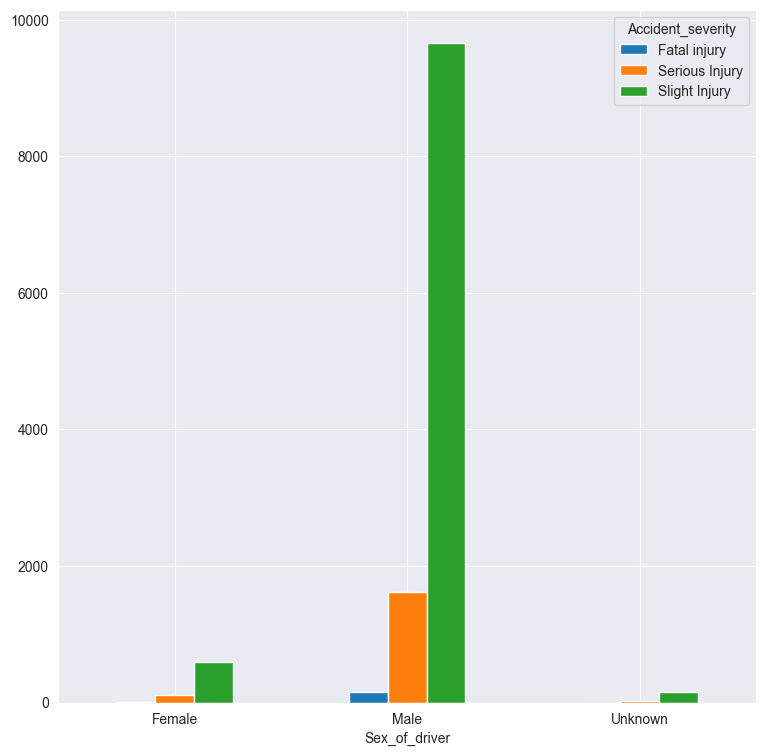

In [19]:
CrosstabResult6=pd.crosstab(index=rta['Sex_of_driver'],columns=rta['Accident_severity'])
CrosstabResult6.plot.bar(figsize=(9,9),rot=0)

# Feature-2: Service_year_of_vehicle

### Lets fill all Nan values with Mode(2-5yrs)

In [20]:
rta['Service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

In [21]:
len(rta['Service_year_of_vehicle'])

12316

In [22]:
rta['Service_year_of_vehicle'] = rta['Service_year_of_vehicle'].fillna('2-5yrs')

In [23]:
rta['Service_year_of_vehicle'].isna().sum()

0

In [24]:
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 2023-06-13 17:02:00      Monday              18-30          Male   
1 2023-06-13 17:02:00      Monday              31-50          Male   
2 2023-06-13 17:02:00      Monday              18-30          Male   
3 2023-06-13 01:06:00      Sunday              18-30          Male   
4 2023-06-13 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   
2      Lorry (41?100Q)            Owner                  2-5yrs   
3  Public (> 45 seats)     Governmental                  2-5yrs   
4                  NaN            Owner                 5-10yrs   

  Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas                NaN   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3       

### Work_of_casuality

In [25]:
rta['Work_of_casuality'].describe()

count       9118
unique         7
top       Driver
freq        5903
Name: Work_of_casuality, dtype: object

In [26]:
rta['Work_of_casuality'].value_counts()

Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: Work_of_casuality, dtype: int64

### Filling the missing value with Mode that is: Driver

In [27]:
rta['Work_of_casuality'] = rta['Work_of_casuality'].fillna('Driver')

In [28]:
rta['Work_of_casuality'].value_counts()

Driver           9101
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: Work_of_casuality, dtype: int64

In [29]:
rta['Work_of_casuality'].isna().sum()

0

### Fitness_of_casuality

In [30]:
rta['Fitness_of_casuality'].value_counts()

Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: Fitness_of_casuality, dtype: int64

In [31]:
rta['Fitness_of_casuality'] = rta['Fitness_of_casuality'].fillna('Normal')

In [32]:
rta['Fitness_of_casuality'].isna().sum()

0

### As we can see most of the causalities are normal, so this column is insignificant

<AxesSubplot:xlabel='Fitness_of_casuality'>

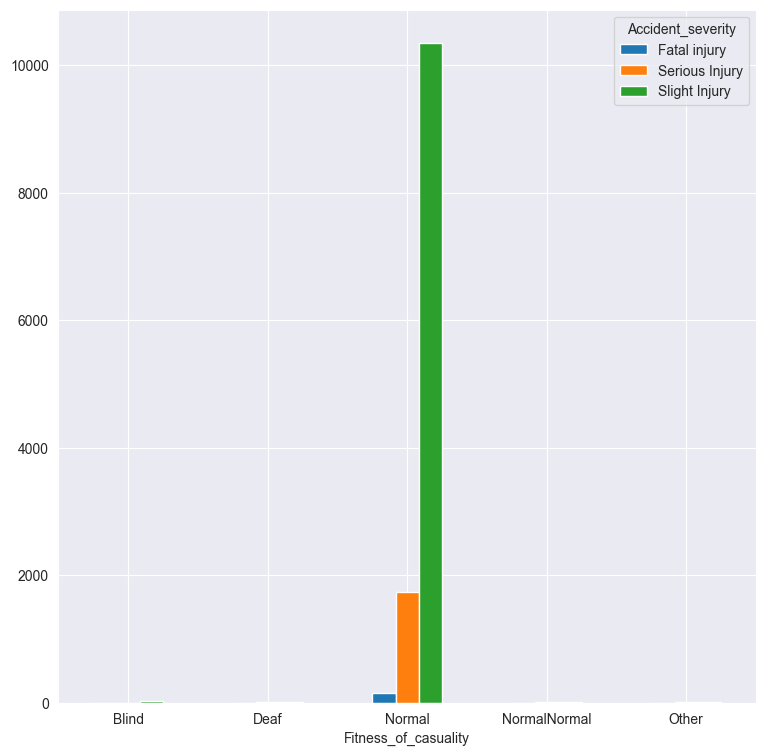

In [33]:
CrosstabResult2=pd.crosstab(index=rta['Fitness_of_casuality'],columns=rta['Accident_severity'])
CrosstabResult2.plot.bar(figsize=(9,9),rot=0)

### Most of the time person is in normal fitness and in very rare case the blind and Deaf are getting into causalities

### Type_of_vehicle

In [34]:
rta['Type_of_vehicle'].describe()

count          11366
unique            17
top       Automobile
freq            3205
Name: Type_of_vehicle, dtype: object

In [35]:
rta['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [36]:
rta['Type_of_vehicle'] = rta['Type_of_vehicle'].fillna('Automobile')

In [37]:
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 2023-06-13 17:02:00      Monday              18-30          Male   
1 2023-06-13 17:02:00      Monday              31-50          Male   
2 2023-06-13 17:02:00      Monday              18-30          Male   
3 2023-06-13 01:06:00      Sunday              18-30          Male   
4 2023-06-13 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   
2      Lorry (41?100Q)            Owner                  2-5yrs   
3  Public (> 45 seats)     Governmental                  2-5yrs   
4           Automobile            Owner                 5-10yrs   

  Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas                NaN   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3       

In [38]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(rta)

Your selected dataframe has 34 columns.
There are 11 columns that have missing values.


Missing Values  % of Total Values
Types_of_Junction                   887                7.2
Driving_experience                  829                6.7
Educational_level                   741                6.0
Vehicle_driver_relation             579                4.7
Owner_of_vehicle                    482                3.9
Lanes_or_Medians                    385                3.1
Vehicle_movement                    308                2.5
Area_accident_occured               239                1.9
Road_surface_type                   172                1.4
Type_of_collision                   155                1.3
Road_allignment                     142                1.2

# Feature: Types_of_Junction

In [39]:
rta['Types_of_Junction'].describe()

count       11429
unique          8
top       Y Shape
freq         4543
Name: Types_of_Junction, dtype: object

In [40]:
rta['Types_of_Junction'].value_counts()

Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

In [41]:
rta['Types_of_Junction'].isna().sum()

887

In [42]:
rta['Types_of_Junction1'] = rta['Types_of_Junction'].fillna(method='ffill',inplace=True)

In [43]:
rta['Types_of_Junction'].value_counts()

No junction    4724
Y Shape        4543
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

In [44]:
rta = rta.drop(['Types_of_Junction1'],axis=1)

In [45]:
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 2023-06-13 17:02:00      Monday              18-30          Male   
1 2023-06-13 17:02:00      Monday              31-50          Male   
2 2023-06-13 17:02:00      Monday              18-30          Male   
3 2023-06-13 01:06:00      Sunday              18-30          Male   
4 2023-06-13 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   
2      Lorry (41?100Q)            Owner                  2-5yrs   
3  Public (> 45 seats)     Governmental                  2-5yrs   
4           Automobile            Owner                 5-10yrs   

  Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas                NaN   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3       

In [46]:
rta['Driving_experience'].fillna(method='ffill',inplace=True)
rta['Educational_level'].fillna(method='ffill',inplace=True)
rta['Vehicle_driver_relation'].fillna(method='ffill',inplace=True)
rta['Owner_of_vehicle'].fillna(method='ffill',inplace=True)
rta['Lanes_or_Medians'].fillna(method='ffill',inplace=True)
rta['Vehicle_movement'].fillna(method='ffill',inplace=True)
rta['Area_accident_occured'].fillna(method='ffill',inplace=True)
rta['Road_surface_type'].fillna(method='ffill',inplace=True)
rta['Type_of_collision'].fillna(method='ffill',inplace=True)
rta['Road_allignment'].fillna(method='ffill',inplace=True)

In [47]:
rta['Lanes_or_Medians'].fillna(method='bfill',inplace=True)

In [48]:
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 2023-06-13 17:02:00      Monday              18-30          Male   
1 2023-06-13 17:02:00      Monday              31-50          Male   
2 2023-06-13 17:02:00      Monday              18-30          Male   
3 2023-06-13 01:06:00      Sunday              18-30          Male   
4 2023-06-13 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   
2      Lorry (41?100Q)            Owner                  2-5yrs   
3  Public (> 45 seats)     Governmental                  2-5yrs   
4           Automobile            Owner                 5-10yrs   

  Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas  Undivided Two way   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                 Tangent road with flat terrain       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3       

In [49]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(rta)

Your selected dataframe has 34 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [50]:
pd.set_option('display.max_columns', 500)

In [51]:
rta[rta['Casualty_class']=='na']

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0     2023-06-13 17:02:00      Monday              18-30          Male   
1     2023-06-13 17:02:00      Monday              31-50          Male   
4     2023-06-13 01:06:00      Sunday              18-30          Male   
7     2023-06-13 17:20:00      Friday              18-30          Male   
10    2023-06-13 14:40:00    Saturday              18-30          Male   
...                   ...         ...                ...           ...   
12307 2023-06-13 17:10:00      Friday              31-50          Male   
12308 2023-06-13 17:10:00      Friday              18-30          Male   
12311 2023-06-13 16:15:00   Wednesday              31-50          Male   
12312 2023-06-13 18:00:00      Sunday            Unknown          Male   
12314 2023-06-13 13:55:00      Sunday              18-30        Female   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
4      Junior high school                Employee              2-5yr   
7      Junior high school                Employee              2-5yr   
10      Above high school                   Owner              1-2yr   
...                   ...                     ...                ...   
12307  Junior high school                Employee         Above 10yr   
12308  Junior high school                Employee         Above 10yr   
12311   Elementary school                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   

            Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0                Automobile            Owner              Above 10yr   
1       Public (> 45 seats)            Owner                 5-10yrs   
4                Automobile            Owner                 5-10yrs   
7                Automobile     Governmental              Above 10yr   
10     Public (13?45 seats)            Owner                 Unknown   
...                     ...              ...                     ...   
12307      Pick up upto 10Q     Governmental               Below 1yr   
12308        Lorry (11?40Q)            Owner                  2-5yrs   
12311        Lorry (11?40Q)            Owner                  2-5yrs   
12312            Automobile            Owner                  2-5yrs   
12314       Lorry (41?100Q)            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
0             No defect     Residential areas   
1             No defect          Office areas   
4             No defect      Industrial areas   
7             No defect     Residential areas   
10            No defect     Residential areas   
...                 ...                   ...   
12307         No defect   Outside rural areas   
12308         No defect   Outside rural areas   
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12314         No defect          Office areas   

                                       Lanes_or_Medians  \
0                                     Undivided Two way   
1                                     Undivided Two way   
4                                                 other   
7                                                 other   
10                                                other   
...                                                 ...   
12307                                 Undivided Two way   
12308                                             other   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent 

In [52]:
rta['Casualty_class'].value_counts()

Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64

In [53]:
rta['Sex_of_casualty'].value_counts()

Male      5253
na        4443
Female    2620
Name: Sex_of_casualty, dtype: int64

In [54]:
rta['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

In [55]:
rta['Casualty_severity'].value_counts()

3     7076
na    4443
2      771
1       26
Name: Casualty_severity, dtype: int64

In [56]:
rta.replace("na",np.nan,inplace=True)
        

In [57]:
rta['Casualty_severity'].fillna(method='bfill',inplace=True)
rta['Age_band_of_casualty'].fillna(method='bfill',inplace=True)
rta['Sex_of_casualty'].fillna(method='bfill',inplace=True)
rta['Casualty_class'].fillna(method='bfill',inplace=True)

In [58]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(rta)

Your selected dataframe has 34 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [59]:
rta.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

### Most of the accidents happening in afternoon time

In [60]:
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 2023-06-13 17:02:00      Monday              18-30          Male   
1 2023-06-13 17:02:00      Monday              31-50          Male   
2 2023-06-13 17:02:00      Monday              18-30          Male   
3 2023-06-13 01:06:00      Sunday              18-30          Male   
4 2023-06-13 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0           Automobile            Owner              Above 10yr   
1  Public (> 45 seats)            Owner                 5-10yrs   
2      Lorry (41?100Q)            Owner                  2-5yrs   
3  Public (> 45 seats)     Governmental                  2-5yrs   
4           Automobile            Owner                 5-10yrs   

  Defect_of_vehicle Area_accident_occured   Lanes_or_Medians  \
0         No defect     Residential areas  Undivided Two way   
1         No defect          Office areas  Undivided Two way   
2         No defect    Recreational areas              other   
3         No defect          Office areas              other   
4         No defect      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                 Tangent road with flat terrain       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0  Driver or rider            Male                31-50                 3   
1  Driver or rider            Male                31-50                 3   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4  Driver or rider            Male                31-50                 3   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3       

In [4]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        
        feat_dict = dict(zip(feat_key, feat_val))
        #print(feat)
        print(feat)
        print(feat_dict)
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(rta, rta.drop(['Accident_severity'], axis=1).columns)
df.shape

Time
{'0:01:00': 0, '0:02:00': 1, '0:03:00': 2, '0:04:00': 3, '0:06:00': 4, '0:08:00': 5, '0:09:00': 6, '0:10:00': 7, '0:11:00': 8, '0:15:00': 9, '0:17:00': 10, '0:18:00': 11, '0:19:00': 12, '0:20:00': 13, '0:21:00': 14, '0:23:00': 15, '0:25:00': 16, '0:26:00': 17, '0:28:00': 18, '0:29:00': 19, '0:30:00': 20, '0:31:00': 21, '0:34:00': 22, '0:35:00': 23, '0:36:00': 24, '0:40:00': 25, '0:41:00': 26, '0:43:00': 27, '0:44:00': 28, '0:45:00': 29, '0:47:00': 30, '0:50:00': 31, '0:51:00': 32, '0:52:00': 33, '0:53:00': 34, '0:54:00': 35, '0:55:00': 36, '0:56:00': 37, '0:57:00': 38, '10:00:00': 39, '10:01:00': 40, '10:02:00': 41, '10:04:00': 42, '10:05:00': 43, '10:07:00': 44, '10:08:00': 45, '10:10:00': 46, '10:11:00': 47, '10:12:00': 48, '10:13:00': 49, '10:15:00': 50, '10:16:00': 51, '10:17:00': 52, '10:18:00': 53, '10:19:00': 54, '10:20:00': 55, '10:21:00': 56, '10:22:00': 57, '10:23:00': 58, '10:24:00': 59, '10:25:00': 60, '10:26:00': 61, '10:27:00': 62, '10:29:00': 63, '10:30:00': 64, '10

(12316, 32)

In [182]:
df.head(100)

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0    735            1                   0              1                  0   
1    735            1                   1              1                  4   
2    735            1                   0              1                  4   
3     42            3                   0              1                  4   
4     42            3                   0              1                  4   
..   ...          ...                 ...            ...                ...   
95   768            4                   0              1                  4   
96   768            4                   0              1                  4   
97   768            4                   1              1                  4   
98   949            3                   0              2                  4   
99   949            3                   2              1                  4   

    Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                         0                   0                0   
1                         0                   3               11   
2                         0                   0                5   
3                         0                   2               11   
4                         0                   1                0   
..                      ...                 ...              ...   
95                        0                   1                5   
96                        0                   1               10   
97                        0                   1                3   
98                        0                   1                0   
99                        0                   3                0   

    Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  \
0                  3                        3                  2   
1                  3                        2                  2   
2                  3                        1                  2   
3                  0                        1                  2   
4                  3                        2                  2   
..               ...                      ...                ...   
95                 3                        1                  2   
96                 3                        1                  2   
97                 3                        2                  2   
98                 3                        1                  2   
99                 3                        2                  2   

    Area_accident_occured  Lanes_or_Medians  Road_allignment  \
0                       9                 4                5   
1                       6                 4                5   
2                       1                 6                5   
3                       6                 6                6   
4                       4                 6                5   
..                    ...               ...              ...   
95                      9                 0                5   
96                      6                 2                6   
97                      6                 2                6   
98                      9                 2                5   
99                      2                 6                5   

    Types_of_Junction  Road_surface_type  Road_surface_conditions  \
0                   1                  0                        0   
1                   1                  0                        0   
2                   1                  0                        0   
3                   7                  2                        0   
4                   7                  0                        0   
..                ...                ...                      ...   
95                  7                  4                        0   
96                  7                  3                        0   
97                  7          

<AxesSubplot:>

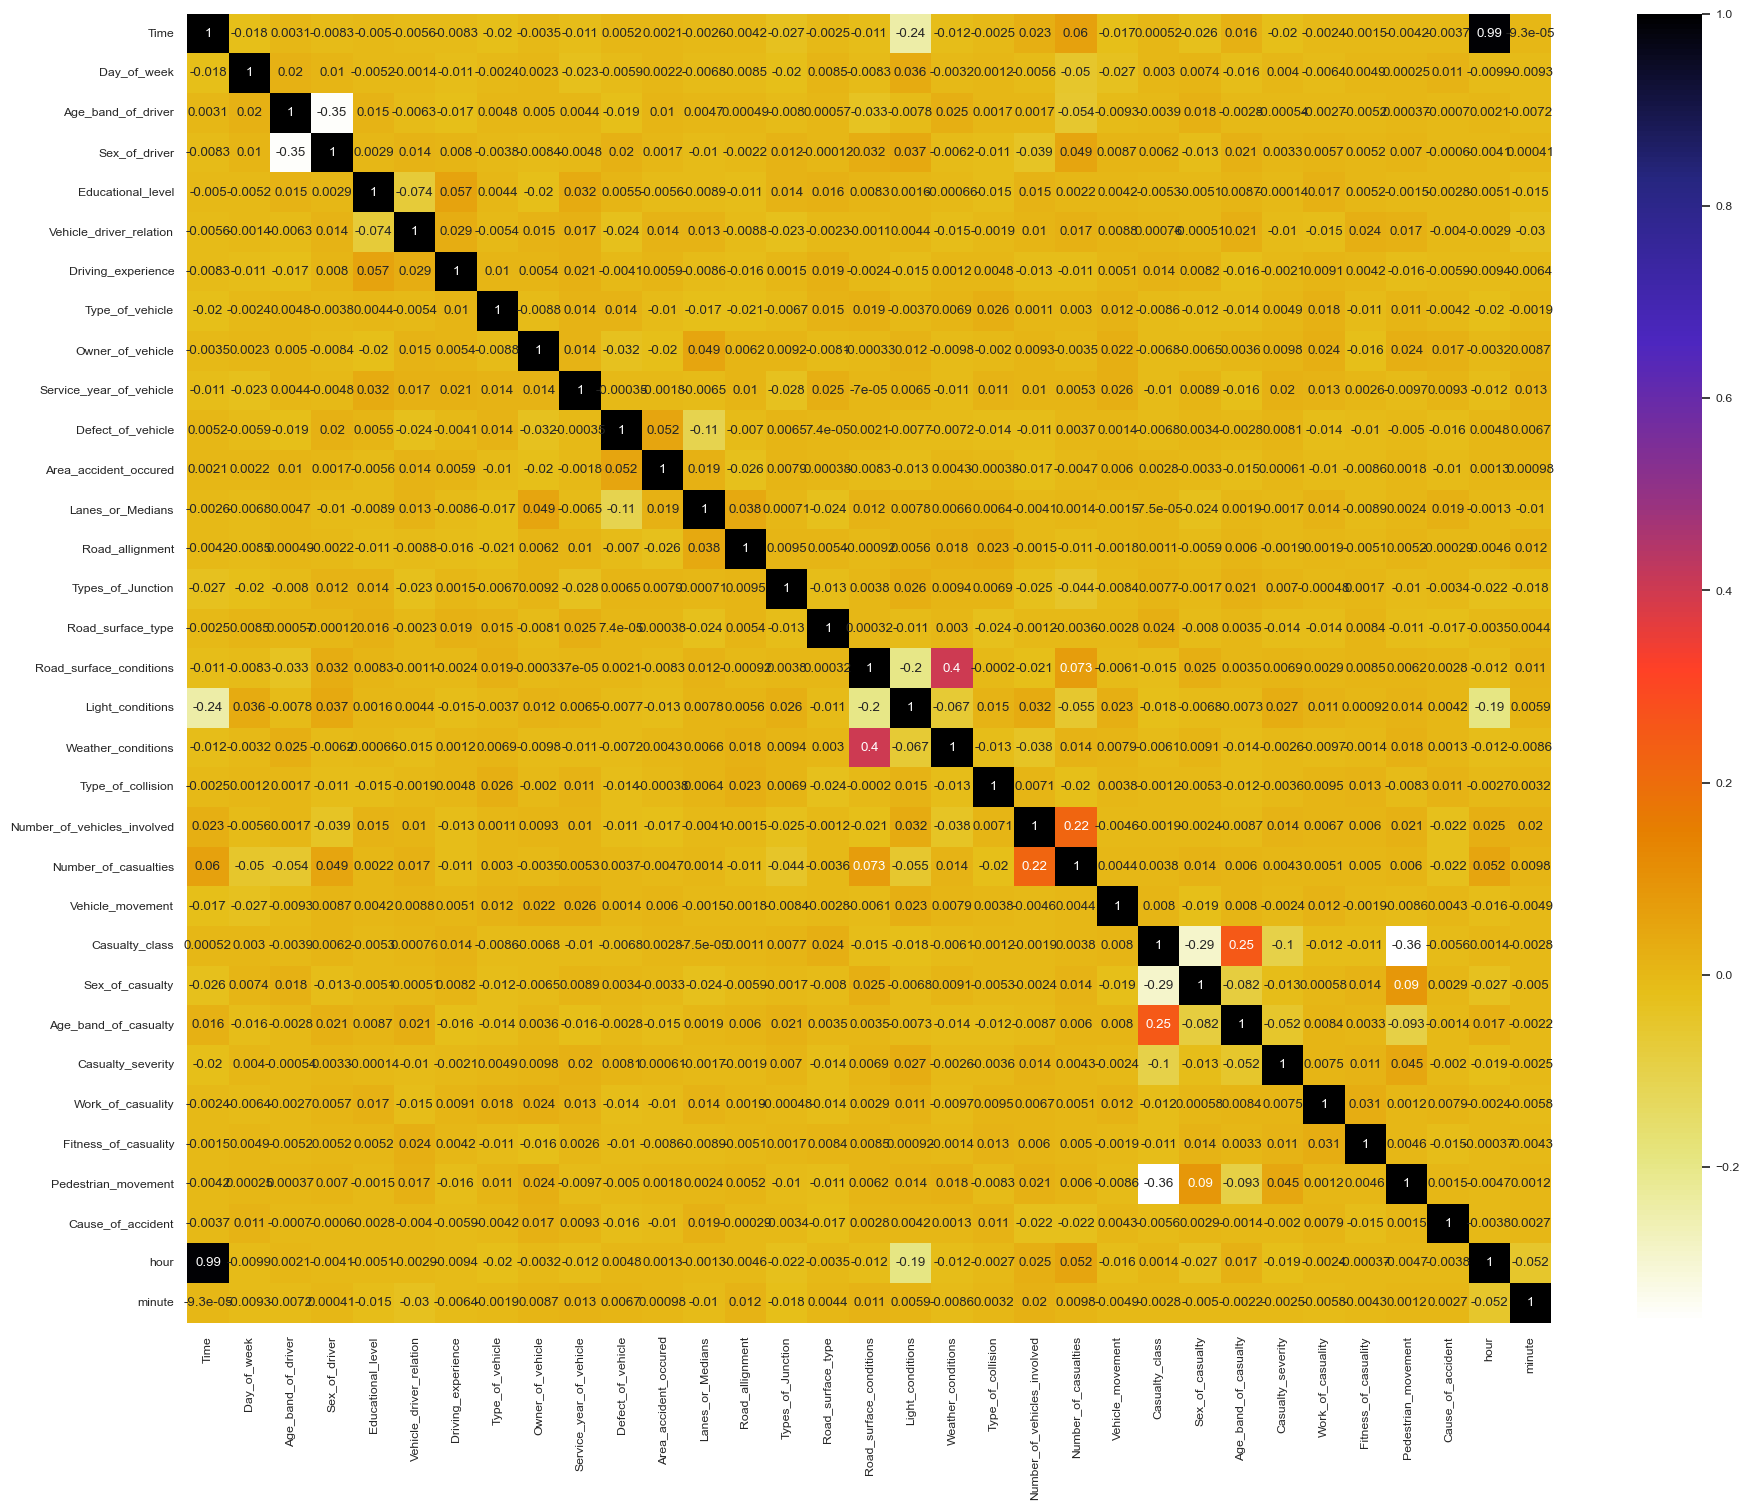

In [63]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [131]:
X = df.drop(['Accident_severity','Time'], axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 32) (3695, 32) (8621,) (3695,)


In [132]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 32) (21972,)


In [133]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [134]:
y_test

4281     2
4010     2
1022     1
8775     2
10000    2
        ..
9855     2
7302     1
9023     2
7936     2
438      2
Name: Accident_severity, Length: 3695, dtype: int32

In [135]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [136]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)#, 
print(scores)

{'xgb': [0.8040595399188092], 'rf': [0.8073071718538566], 'extree': [0.8192151556156969]}


In [137]:
X_train

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0                6                   1              1                  2   
1                6                   1              1                  1   
2                3                   4              0                  4   
3                2                   1              1                  4   
4                5                   3              1                  2   
...            ...                 ...            ...                ...   
21967            4                   1              0                  2   
21968            0                   0              1                  3   
21969            2                   0              1                  4   
21970            0                   0              1                  4   
21971            2                   1              1                  4   

       Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                            0                   0                0   
1                            0                   4               14   
2                            0                   0                7   
3                            0                   2                9   
4                            0                   1                0   
...                        ...                 ...              ...   
21967                        0                   4                5   
21968                        0                   1                0   
21969                        0                   1                5   
21970                        0                   3                5   
21971                        0                   2                0   

       Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  \
0                     3                        5                  2   
1                     3                        3                  2   
2                     3                        5                  2   
3                     3                        3                  2   
4                     1                        2                  2   
...                 ...                      ...                ...   
21967                 3                        1                  2   
21968                 3                        2                  2   
21969                 3                        4                  2   
21970                 3                        3                  2   
21971                 1                        1                  2   

       Area_accident_occured  Lanes_or_Medians  Road_allignment  \
0                          7                 4                5   
1                          7                 2                5   
2                          7                 2                5   
3                          7                 4                5   
4                          2                 2                5   
...                      ...               ...              ...   
21967                      8                 2                5   
21968                      3                 2                5   
21969                      6                 2                5   
21970                      6                 1                5   
21971                      7                 2                6   

       Types_of_Junction  Road_surface_type  Road_surface_conditions  \
0                      1                  0                        0   
1                      1                  0                        0   
2                      0                  0                        0   
3                      7                  0                        0   
4                      0                  0                        3   
...                  ...                ...                      ...   
21967                  1                  0                        1   
21968  

In [138]:
y_train

0        2
1        1
2        1
3        2
4        1
        ..
21967    1
21968    1
21969    1
21970    1
21971    1
Name: Accident_severity, Length: 21972, dtype: int32

In [139]:
from sklearn.preprocessing import LabelEncoder
rta_Accident_severity_label = LabelEncoder().fit_transform(rta.Accident_severity)
Y_label = rta_Accident_severity_label

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y_label, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 32) (3695, 32) (8621,) (3695,)


In [141]:
# upsampling using smote
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 32) (21972,)


In [142]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [143]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8073071718538566], 'rf': [0.8100135317997293], 'extree': [0.8208389715832206]}


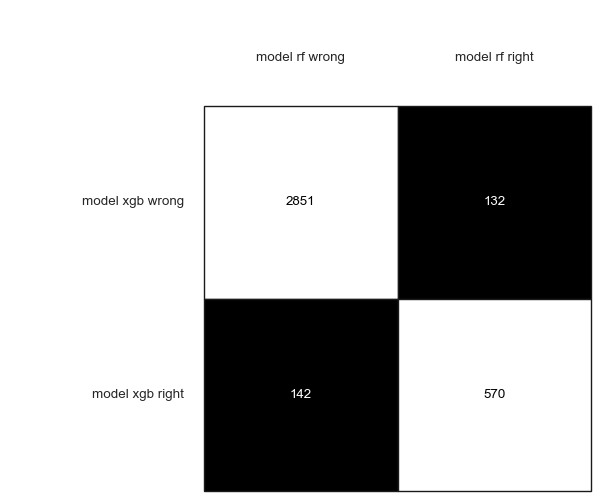

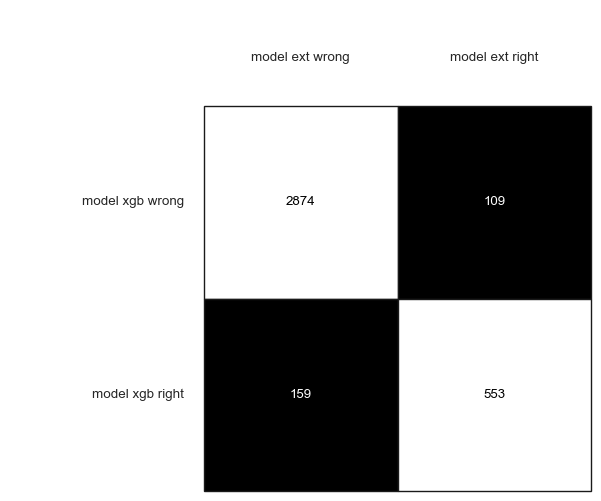

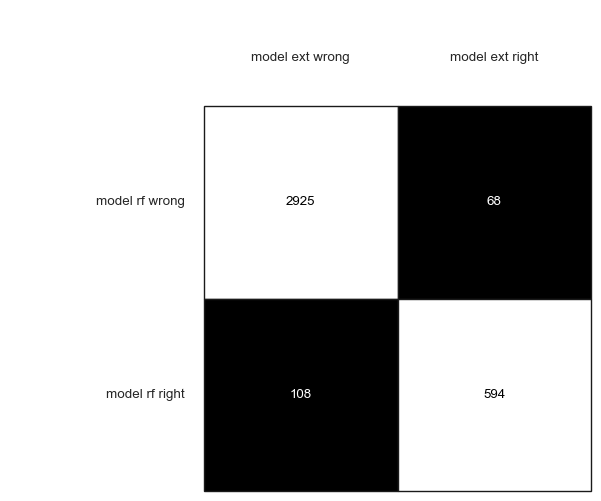

In [144]:
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'


y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test, 
                    y_pred_xgb,
                    y_pred_rf, 
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [145]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [146]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [147]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [148]:
model_performance(extree,y_test, y_pred)

In [149]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 400},
 0.8729121264529159)

In [150]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2},
 0.9188129859487114)

In [162]:
gsearch2.best_estimator_.score

<bound method ClassifierMixin.score of ExtraTreesClassifier(class_weight='balanced', max_depth=20, min_samples_split=3)>

In [163]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 3,
                                class_weight = 'balanced',
                                max_depth = 20,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=20, min_samples_split=3,
                     n_estimators=400)

In [164]:
print(extree_tuned.feature_importances_)

[0.04987772 0.04928586 0.01350707 0.02968453 0.02828722 0.03692619
 0.03253706 0.02126011 0.03299749 0.00174858 0.02809196 0.03718161
 0.01439879 0.04084366 0.01173306 0.03689971 0.05588339 0.01646461
 0.0353033  0.05264095 0.05747892 0.02109921 0.03478808 0.0332479
 0.03585058 0.01852685 0.02662196 0.00197699 0.01341055 0.03791699
 0.04050784 0.05302128]


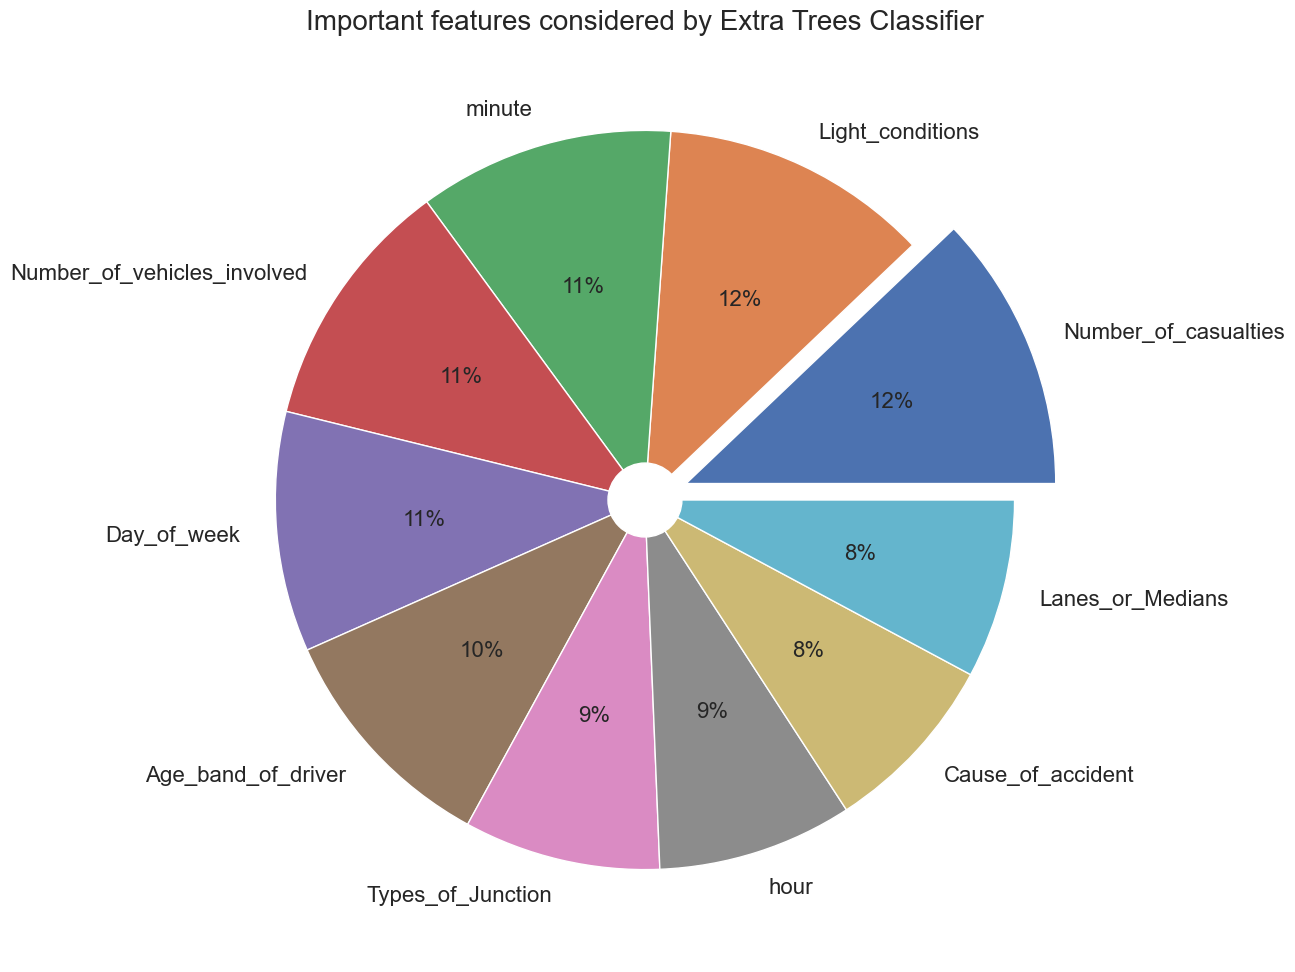

In [165]:

feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

In [166]:
labels=feat_importances.nlargest(10)

In [167]:
labels

Number_of_casualties           0.057479
Light_conditions               0.055883
minute                         0.053021
Number_of_vehicles_involved    0.052641
Day_of_week                    0.049878
Age_band_of_driver             0.049286
Types_of_Junction              0.040844
hour                           0.040508
Cause_of_accident              0.037917
Lanes_or_Medians               0.037182
dtype: float64

In [168]:
extree_tuned.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2])

In [169]:
X_test.shape

(3695, 32)

In [170]:
X_train.shape

(21972, 32)

In [171]:
from sklearn.feature_selection import SelectFromModel
# Retrieve the feature importances
importances = extree_tuned.feature_importances_

# Create a feature selection model based on the importances
sfm = SelectFromModel(extree_tuned, threshold=0.05)  # Adjust the threshold as needed
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Train the model using the reduced number of features
#etc_selected = ExtraTreesClassifier()

gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train_selected, y=y_train)

params2 = {
    'max_depth': [11,20],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)


X_train_reduced = X_train[feat_importances.nlargest(10).index]
X_test_reduced = X_test[feat_importances.nlargest(10).index]
extree_model_reduced = gsearch2.fit(X_train_reduced, y_train)
# Evaluate the model performance on the test set
accuracy = extree_model_reduced.score(X_test_reduced, y_test)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Accuracy: 0.8006779789777779


In [172]:
extree_model_reduced.predict(X_test_reduced)

array([2, 2, 1, ..., 2, 0, 1])

In [173]:
extree_model_reduced.best_estimator_

ExtraTreesClassifier(max_depth=20)

In [174]:
joblib.dump(extree_model_reduced.best_estimator_, 'rta.pkl')
# loaded_model = joblib.load('model_filename.pkl')

['rta.pkl']

In [175]:
loaded_model = joblib.load('rta.pkl')

In [176]:
X_test_reduced_reindexed = X_test_reduced.reset_index(drop=True)

In [177]:
labels=feat_importances.nlargest(10).index

In [179]:
labels

Index(['Number_of_casualties', 'Light_conditions', 'minute',
       'Number_of_vehicles_involved', 'Day_of_week', 'Age_band_of_driver',
       'Types_of_Junction', 'hour', 'Cause_of_accident', 'Lanes_or_Medians'],
      dtype='object')

### Now lets only consider these 10 features as while building streamlit app, we need to have only important features

In [180]:
selected_columns = ['Number_of_casualties', 'Light_conditions', 'minute',
       'Number_of_vehicles_involved', 'Day_of_week', 'Age_band_of_driver',
       'Types_of_Junction', 'hour', 'Cause_of_accident', 'Lanes_or_Medians']
X_train_selected = X_train[selected_columns].copy()

In [ ]:
# converting 'time' to datetime
rta['Time'] = pd.to_datetime(rta['Time'])

# date (day-month-year) time
rta["Time"].dt.hour

# extracting hour and minute from timestamp
rta['hour'] = rta['Time'].dt.hour
rta['minute'] = rta['Time'].dt.minute
#rta.drop('Time', axis=1, inplace=True)

In [99]:
rta.head()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0   735            1                   0              1                  0   
1   735            1                   1              1                  4   
2   735            1                   0              1                  4   
3    42            3                   0              1                  4   
4    42            3                   0              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1                0   

   Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  \
0                 3                        3                  2   
1                 3                        2                  2   
2                 3                        1                  2   
3                 0                        1                  2   
4                 3                        2                  2   

   Area_accident_occured  Lanes_or_Medians  Road_allignment  \
0                      9                 4                5   
1                      6                 4                5   
2                      1                 6                5   
3                      6                 6                6   
4                      4                 6                5   

   Types_of_Junction  Road_surface_type  Road_surface_conditions  \
0                  1                  0                        0   
1                  1                  0                        0   
2                  1                  0                        0   
3                  7                  2                        0   
4                  7                  0                        0   

   Light_conditions  Weather_conditions  Type_of_collision  \
0                 3                   2                  3   
1                 3                   2                  8   
2                 3                   2                  2   
3                 0                   2                  8   
4                 0                   2                  8   

   Number_of_vehicles_involved  Number_of_casualties  Vehicle_movement  \
0                            1                     1                 2   
1                            1                     1                 2   
2                            1                     1                 2   
3                            1                     1                 2   
4                            1                     1                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               0                1                     1                  2   
1               0                1                     1                  2   
2               0                1                     1                  2   
3               2                0                     0                  2   
4               0                1                     1                  2   

   Work_of_casuality  Fitness_of_casuality  Pedestrian_movement  \
0                  0                     2                    5   
1                  0                     2                    5   
2                  0                     2                    5   
3                  0                     2                    5   
4                  0                     2                    5   

   Cause_of_accident Accident_severity  hour  minute  
0                  9     Slight Injury    17       2  
1                 16     Slight Injury    17       2  
2                  0    Serious Injury    17       2  
3                  1    

In [189]:
feats = ['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18']
feat_val = list(1+np.arange(len(feats)))

In [190]:
feat_val

[1, 2, 3, 4, 5]

In [6]:
D_day = {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
['Friday'].map(D_day)

AttributeError: 'list' object has no attribute 'map'